## Importing Libraries

In [44]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

## Importing Data and Description

In [45]:
df = pd.read_csv("C:\\Users\\Dhruv\\Downloads\\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset hence I am going to skip the missing value analysis and missing value imputation part.

## EDA

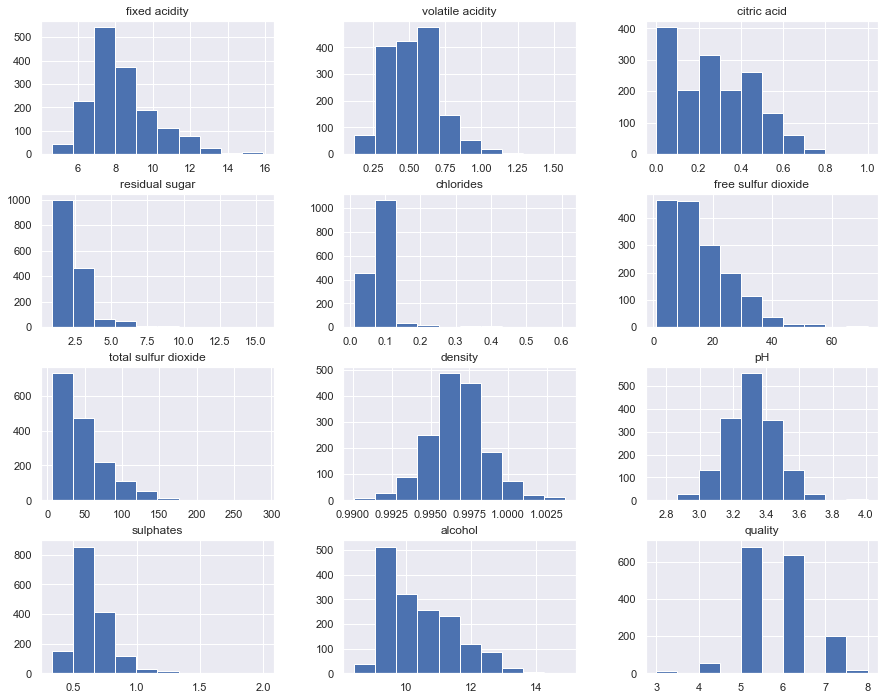

In [49]:
df.hist(bins=10,figsize=(15,12))
plt.show()

<AxesSubplot: >

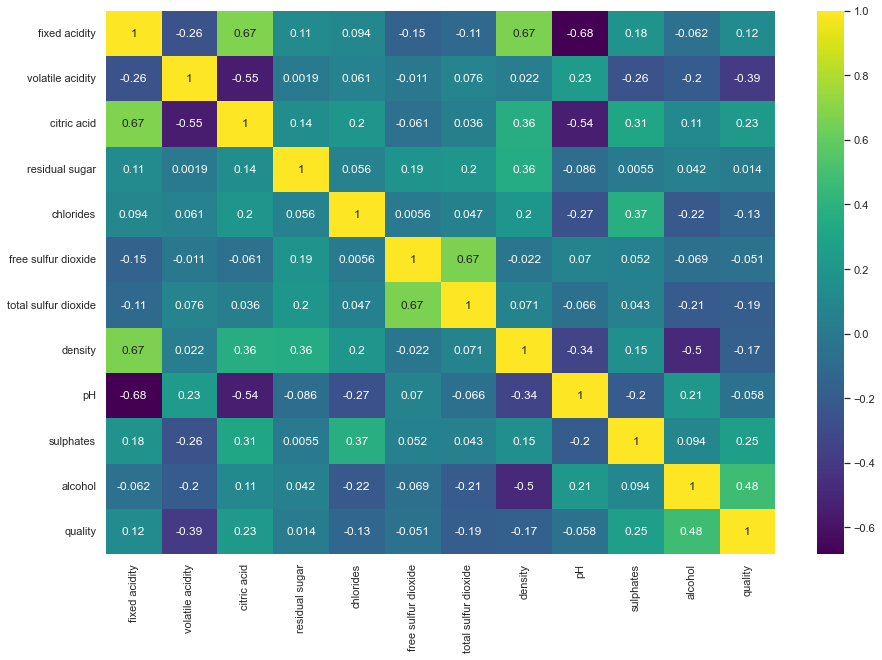

In [50]:
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='viridis')

In [51]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The above results shows the measure of correlation between quality and other columns. It can be deduced that alcohol has highest correlation value. After that we have sulphates, citric acid, fixed acidity and residual sugar. </br>

## Converting Quality into catagory

In [52]:
categor_condn=[ (df['quality']>=7),
               (df['quality']<=4)]
rating=['superior','inferior']
df['rating'] = np.select(categor_condn,rating,default='fine')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,fine


In [53]:
df['rating'].value_counts()

fine        1319
superior     217
inferior      63
Name: rating, dtype: int64

In [54]:
df = df.drop(['quality'], axis='columns')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,fine
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,fine
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,fine
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,fine
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,fine


### Feature Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
df['rating'] = labelencoder_y.fit_transform(df['rating'])

In [77]:
X = df.drop('rating', axis = 1)
y = df['rating'].values.reshape(-1,1)

In [78]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [79]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=50)

### Feature Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [82]:
results = []

# Predictions

## Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
model_DT.fit(X_train_scale, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

### Cross validation

In [84]:
cv_score_DT = cross_val_score(estimator = model_DT, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('DT REPORT')
print("CV Score: ", cv_score_DT.mean())

y_train_predict_DT = model_DT.predict(X_train_scale)
train_accuracy_DT = accuracy_score(y_train, y_train_predict_DT)
print("Training set accuracy: ", train_accuracy_DT)

y_test_predict_DT = model_DT.predict(X_test_scale)
test_accuracy_DT = accuracy_score(y_test, y_test_predict_DT)
print("Test set accuracy: ", test_accuracy_DT)

results.append(test_accuracy_DT)

DT REPORT
CV Score:  0.8159105534105533
Training set accuracy:  1.0
Test set accuracy:  0.8166666666666667


In [85]:
confusion_matrix(y_test, y_test_predict_DT)

array([[365,   9,  34],
       [ 12,   1,   2],
       [ 30,   1,  26]], dtype=int64)

## Random Forest (Ensemble Learning)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 900, random_state=40)
model_RF.fit(X_train_scale, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=900,
                       random_state=40)

### Cross validation

In [87]:
cv_score_RF = cross_val_score(estimator = model_RF, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('RF REPORT')
print("CV Score: ", cv_score_RF.mean())

y_train_predict_RF = model_RF.predict(X_train_scale)
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
print("Training set accuracy: ", train_accuracy_RF)

y_test_predict_RF = model_RF.predict(X_test_scale)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)
print("Test set accuracy: ", test_accuracy_RF)

results.append(test_accuracy_RF)

RF REPORT
CV Score:  0.8552364864864865
Training set accuracy:  1.0
Test set accuracy:  0.8833333333333333


In [88]:
confusion_matrix(y_test, y_test_predict_RF)

array([[395,   2,  11],
       [ 15,   0,   0],
       [ 28,   0,  29]], dtype=int64)

## SVM

In [89]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train_scale, y_train.ravel())

SVC()

### Cross Validation

In [90]:
cv_score_SVC = cross_val_score(estimator = model_SVC, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('SVC REPORT')
print("CV Score: ", cv_score_SVC.mean())

y_train_predict_SVC = model_SVC.predict(X_train_scale)
train_accuracy_SVC = accuracy_score(y_train, y_train_predict_SVC)
print("Training set accuracy: ", train_accuracy_SVC)

y_test_predict_SVC = model_SVC.predict(X_test_scale)
test_accuracy_SVC = accuracy_score(y_test, y_test_predict_SVC)
print("Test set accuracy: ", test_accuracy_SVC)

results.append(test_accuracy_SVC)

SVC REPORT
CV Score:  0.8328989703989704
Training set accuracy:  0.8525469168900804
Test set accuracy:  0.8625


In [91]:
confusion_matrix(y_test, y_test_predict_SVC)

array([[393,   2,  13],
       [ 15,   0,   0],
       [ 36,   0,  21]], dtype=int64)

In [93]:
result_df = DataFrame({"ML Models":["Decision Tree","Random Forest","SVC"],"Score":results})

In [94]:
result_df

,ML Models,Score
0,Decision Tree,0.816667
1,Random Forest,0.883333
2,SVC,0.862500


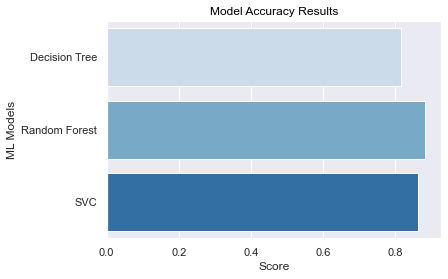

In [95]:
g = sns.barplot(x="Score", y="ML Models", data = result_df, palette='Blues')
g.set_xlabel("Score")
g.set_title("Model Accuracy Results", color = "Black")
plt.show()

#### we can see that Random Forest has the highest accuracy with 88%

In [96]:
import pickle
pickle.dump(model_RF, open("model.pkl","wb"))


In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
